<a href="https://colab.research.google.com/github/kde9867/SW/blob/main/%EC%8B%AC%EB%A6%AC_%EC%84%B1%ED%96%A5_%EC%98%88%EC%B8%A1%EC%9D%84_%EC%9C%84%ED%95%9C_LGBM_BASELINE_(5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import missingno as msno
import xgboost as xgb
from xgboost import XGBClassifier
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')
dum = pd.read_csv('county_dum_and_dropna (1).csv')

In [ ]:
train.head()

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
0,0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,...,1.0,20,2.0,12.0,4.0,2.0,1.0,4.0,2.0,1
1,1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,...,1.0,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1
2,2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,...,2.0,43,1.0,2.0,2.0,2.0,3.0,4.0,2.0,1
3,3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,...,1.0,17,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1
4,4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,...,2.0,18,2.0,12.0,1.0,2.0,1.0,1.0,2.0,0


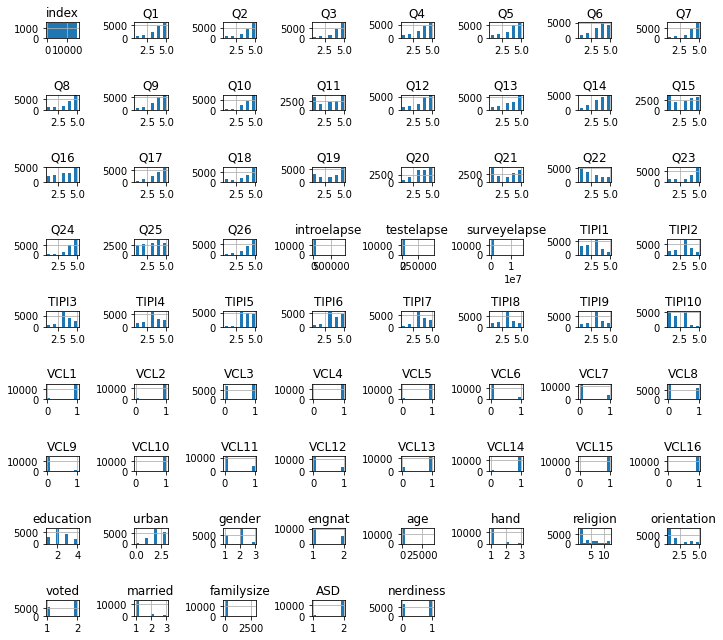

In [ ]:
train.hist(figsize=(10,9))
plt.tight_layout()
plt.show()

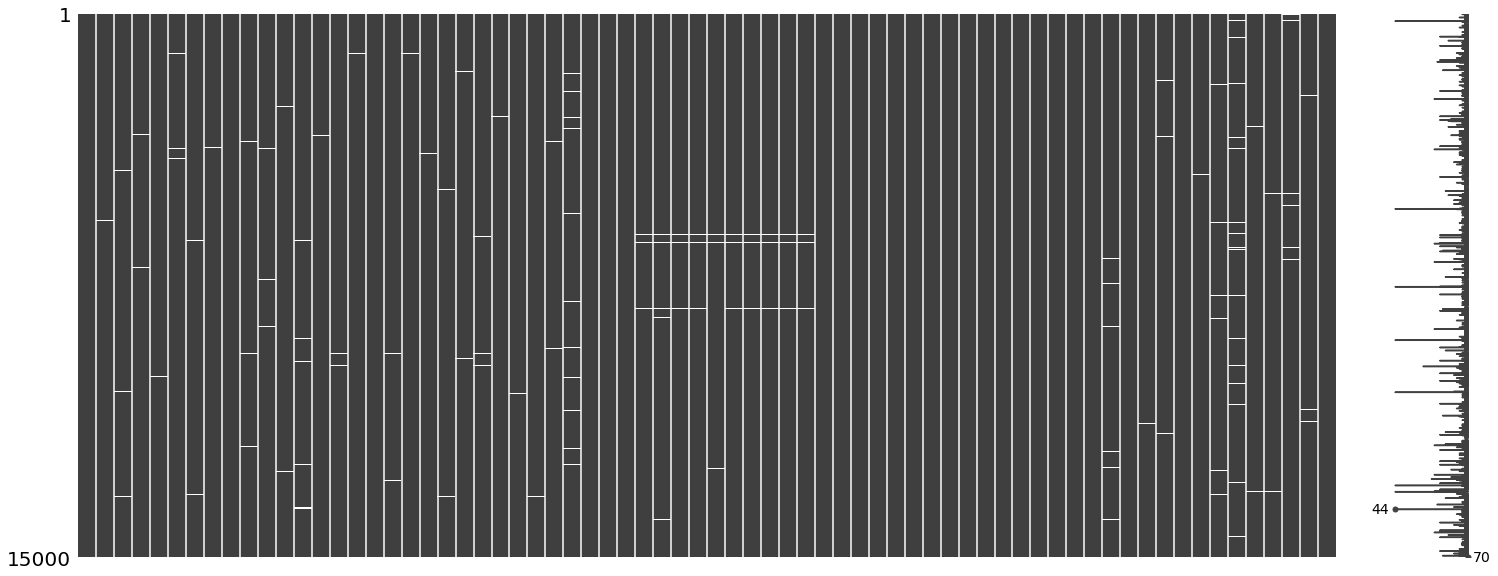

In [ ]:
df = pd.read_csv('train.csv', dtype={"A": pd.Int64Dtype()}, parse_dates=[3])
msno.matrix(df)
plt.show()

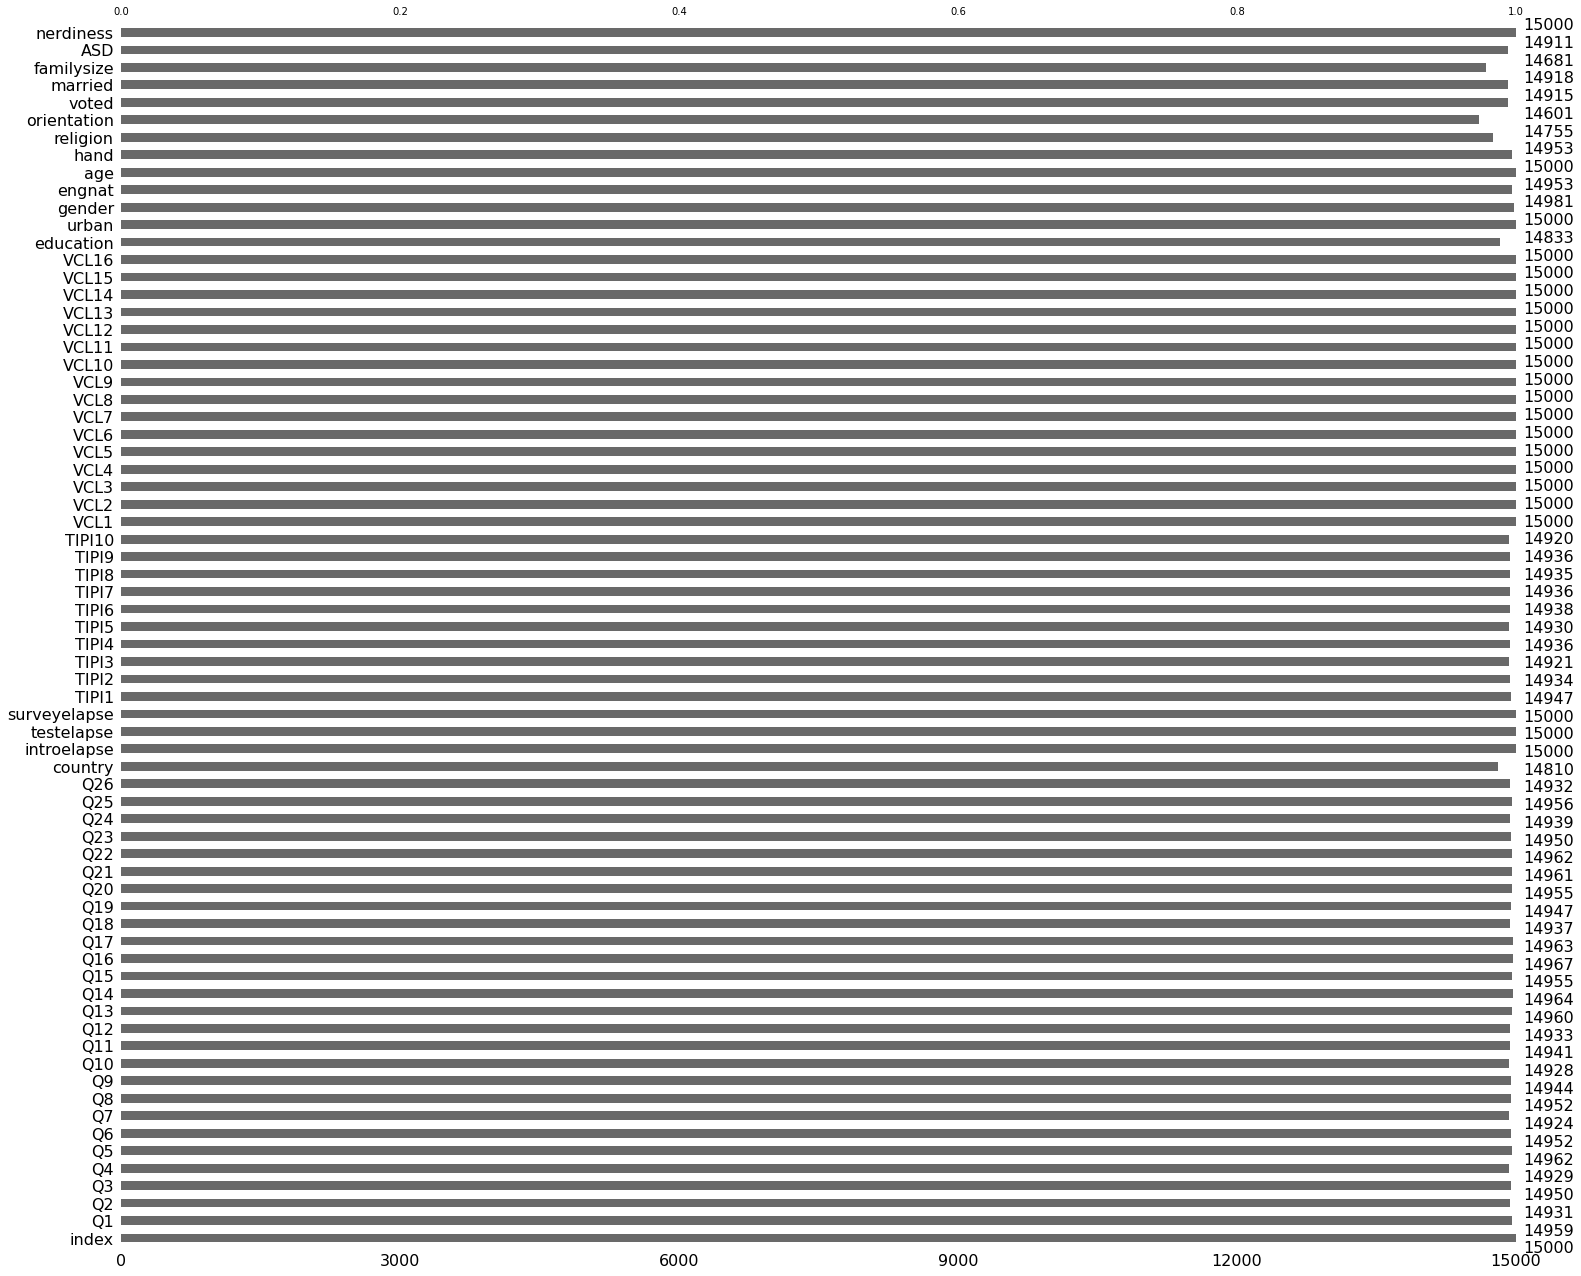

In [ ]:
msno.bar(df)
plt.show()

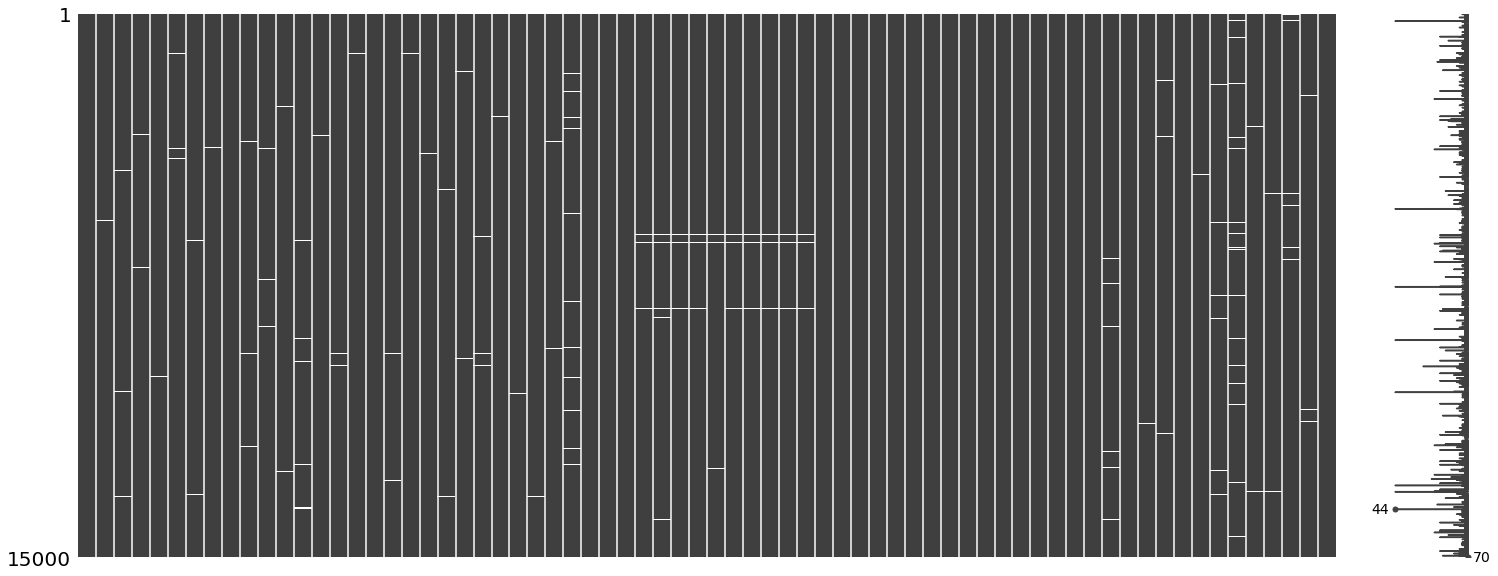

In [ ]:
msno.matrix(df)
plt.show()

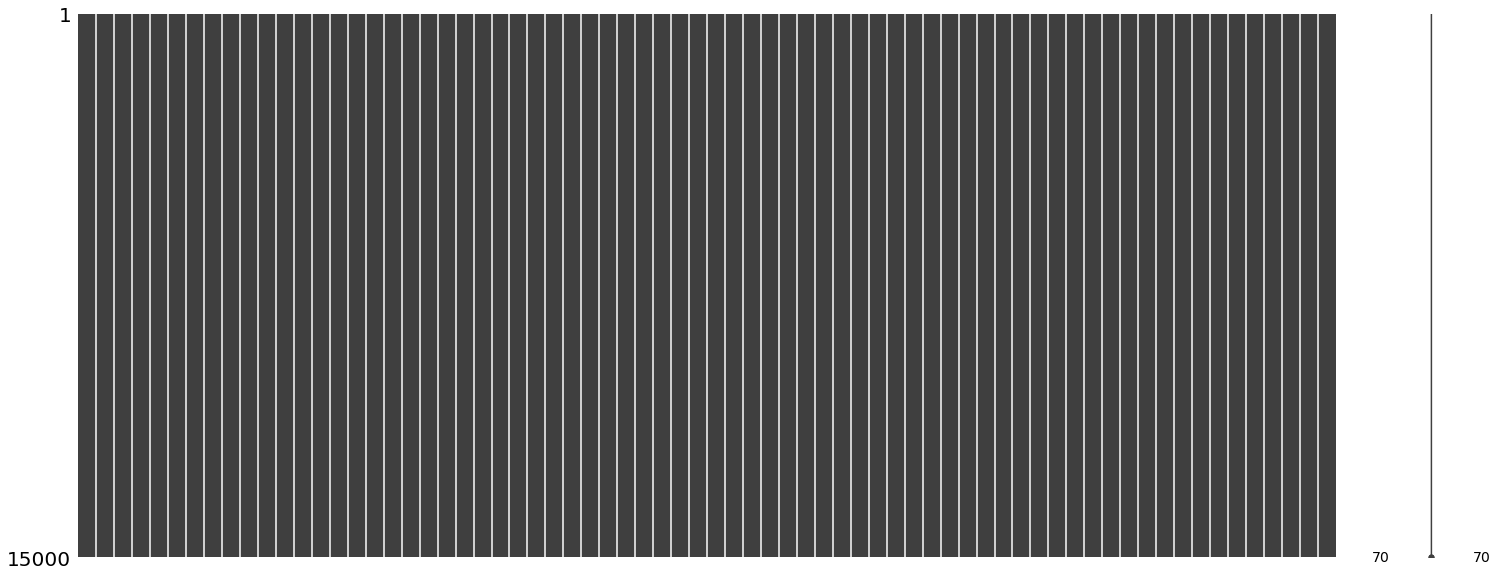

In [ ]:
df.fillna(0)
msno.matrix(df)
plt.show()


In [10]:
raw = pd.read_csv('county_dum_and_dropna (1).csv')
raw.corr()

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness,country
index,1.000000,0.000450,-0.008411,-0.007545,-0.001189,0.009884,0.005317,-0.001693,0.001747,0.007333,...,0.003435,-0.002794,0.005513,0.008258,0.002698,0.006958,-0.013406,-0.013940,0.009897,-0.013110
Q1,0.000450,1.000000,0.187795,0.377656,0.576809,0.225523,0.166752,0.106837,0.323378,0.172941,...,0.002328,0.026008,-0.000326,0.156099,0.078736,-0.139941,0.006202,-0.117180,0.290291,0.007232
Q2,-0.008411,0.187795,1.000000,0.145473,0.191724,0.173225,0.147065,0.345485,0.246302,0.194986,...,-0.009800,0.047640,-0.028793,0.069865,-0.016765,-0.024412,0.006294,-0.031973,0.267388,-0.003693
Q3,-0.007545,0.377656,0.145473,1.000000,0.332286,0.145413,0.193666,0.076621,0.352121,0.082157,...,-0.033216,0.010356,-0.033025,0.152797,0.061323,-0.112973,0.006122,-0.090341,0.201148,0.022157
Q4,-0.001189,0.576809,0.191724,0.332286,1.000000,0.270218,0.215022,0.126343,0.263971,0.211404,...,0.005287,0.046891,-0.014313,0.180428,0.025791,-0.081011,0.007716,-0.168834,0.268228,0.035625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
married,0.006958,-0.139941,-0.024412,-0.112973,-0.081011,0.061417,0.046239,0.065334,-0.119591,0.048168,...,0.017037,0.000330,0.042171,-0.149912,-0.195429,1.000000,0.001147,0.043025,-0.021366,0.052572
familysize,-0.013406,0.006202,0.006294,0.006122,0.007716,0.007136,0.009879,0.005959,0.006475,0.008025,...,0.002185,0.033410,0.019382,0.021733,-0.011722,0.001147,1.000000,-0.033907,-0.011637,0.011168
ASD,-0.013940,-0.117180,-0.031973,-0.090341,-0.168834,-0.078905,-0.041696,-0.021721,-0.052418,-0.038230,...,0.003664,-0.032590,-0.006595,-0.092158,-0.008220,0.043025,-0.033907,1.000000,-0.054374,-0.000645
nerdiness,0.009897,0.290291,0.267388,0.201148,0.268228,0.237681,0.308301,0.205133,0.229419,0.226629,...,0.006273,0.014804,-0.037217,0.070366,-0.017562,-0.021366,-0.011637,-0.054374,1.000000,0.040752


In [11]:
df = raw.corr()
df

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness,country
index,1.000000,0.000450,-0.008411,-0.007545,-0.001189,0.009884,0.005317,-0.001693,0.001747,0.007333,...,0.003435,-0.002794,0.005513,0.008258,0.002698,0.006958,-0.013406,-0.013940,0.009897,-0.013110
Q1,0.000450,1.000000,0.187795,0.377656,0.576809,0.225523,0.166752,0.106837,0.323378,0.172941,...,0.002328,0.026008,-0.000326,0.156099,0.078736,-0.139941,0.006202,-0.117180,0.290291,0.007232
Q2,-0.008411,0.187795,1.000000,0.145473,0.191724,0.173225,0.147065,0.345485,0.246302,0.194986,...,-0.009800,0.047640,-0.028793,0.069865,-0.016765,-0.024412,0.006294,-0.031973,0.267388,-0.003693
Q3,-0.007545,0.377656,0.145473,1.000000,0.332286,0.145413,0.193666,0.076621,0.352121,0.082157,...,-0.033216,0.010356,-0.033025,0.152797,0.061323,-0.112973,0.006122,-0.090341,0.201148,0.022157
Q4,-0.001189,0.576809,0.191724,0.332286,1.000000,0.270218,0.215022,0.126343,0.263971,0.211404,...,0.005287,0.046891,-0.014313,0.180428,0.025791,-0.081011,0.007716,-0.168834,0.268228,0.035625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
married,0.006958,-0.139941,-0.024412,-0.112973,-0.081011,0.061417,0.046239,0.065334,-0.119591,0.048168,...,0.017037,0.000330,0.042171,-0.149912,-0.195429,1.000000,0.001147,0.043025,-0.021366,0.052572
familysize,-0.013406,0.006202,0.006294,0.006122,0.007716,0.007136,0.009879,0.005959,0.006475,0.008025,...,0.002185,0.033410,0.019382,0.021733,-0.011722,0.001147,1.000000,-0.033907,-0.011637,0.011168
ASD,-0.013940,-0.117180,-0.031973,-0.090341,-0.168834,-0.078905,-0.041696,-0.021721,-0.052418,-0.038230,...,0.003664,-0.032590,-0.006595,-0.092158,-0.008220,0.043025,-0.033907,1.000000,-0.054374,-0.000645
nerdiness,0.009897,0.290291,0.267388,0.201148,0.268228,0.237681,0.308301,0.205133,0.229419,0.226629,...,0.006273,0.014804,-0.037217,0.070366,-0.017562,-0.021366,-0.011637,-0.054374,1.000000,0.040752


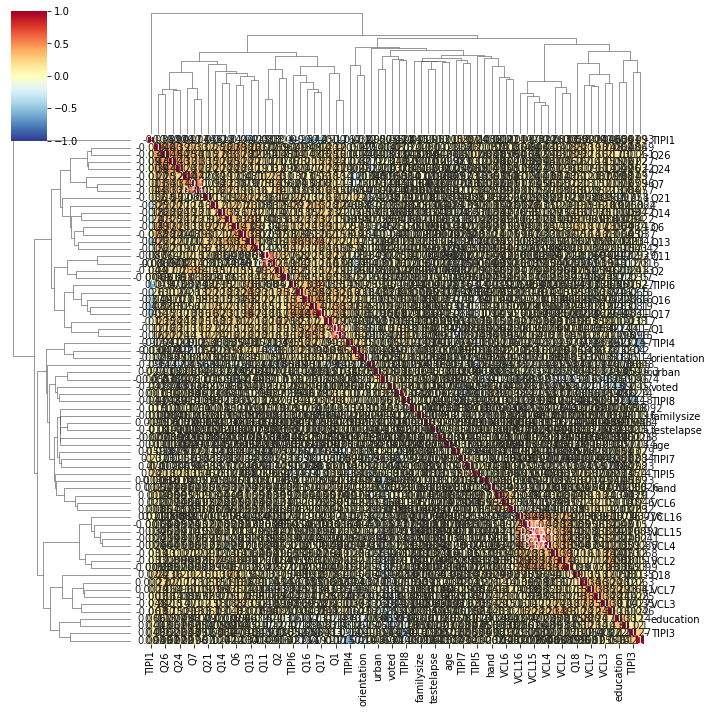

In [12]:
df = raw.corr()

sns.clustermap(df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

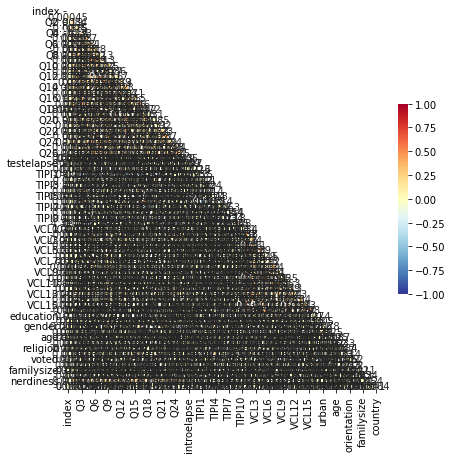

In [13]:
df = raw.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(7,7) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 70 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         15000 non-null  int64  
 1   Q1            14959 non-null  float64
 2   Q2            14931 non-null  float64
 3   Q3            14950 non-null  float64
 4   Q4            14929 non-null  float64
 5   Q5            14962 non-null  float64
 6   Q6            14952 non-null  float64
 7   Q7            14924 non-null  float64
 8   Q8            14952 non-null  float64
 9   Q9            14944 non-null  float64
 10  Q10           14928 non-null  float64
 11  Q11           14941 non-null  float64
 12  Q12           14933 non-null  float64
 13  Q13           14960 non-null  float64
 14  Q14           14964 non-null  float64
 15  Q15           14955 non-null  float64
 16  Q16           14967 non-null  float64
 17  Q17           14963 non-null  float64
 18  Q18           14937 non-nu

# 모델링 

In [ ]:
train = train.drop(['index', 'country'],axis = 1)
test =test.drop(['index', 'country'],axis = 1)

In [ ]:
#train을 target과 feature로 나눠줍니다.
train_x=train.drop(['nerdiness'], axis=1)
train_y=train['nerdiness']

In [ ]:
lgbm_clf = LGBMClassifier(
            n_estimators=1000
        )
lgbm_clf.fit(train_x, train_y)

lgbm_pred = lgbm_clf.predict(test)

# 제출 파일 생성

In [ ]:
submission = pd.read_csv('sample_submission.csv')

submission

,index,nerdiness
0,0,-1
1,1,-1
2,2,-1
3,3,-1
4,4,-1
...,...,...
35447,35447,-1
35448,35448,-1
35449,35449,-1
35450,35450,-1


In [ ]:
submission["nerdiness"] = lgbm_pred

In [ ]:
submission

,index,nerdiness
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
35447,35447,1
35448,35448,1
35449,35449,1
35450,35450,0


In [ ]:
submission.to_csv("baseline.csv", index = False)